In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

/home/neha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [3]:
df = pd.read_csv('Dataset/cleaned_train_file.csv')

In [4]:
df.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,4,0,1,2,2,4,33,1,1,2,4,23371,1.8688,4,5,3,0.1841
1,EID_18000,1,3,1,3,3,0,4,36,0,3,2,3,18000,-0.4537,3,5,3,0.0670
2,EID_3891,0,3,0,0,8,2,3,51,0,2,2,4,3891,-0.4537,3,8,3,0.0851
3,EID_17492,0,3,1,2,1,1,3,56,1,3,2,3,17492,-0.4537,3,7,3,0.0668
4,EID_22534,0,1,0,3,3,2,4,62,1,3,3,1,22534,-0.4537,2,8,2,0.1827


In [5]:
df.shape

(7000, 19)

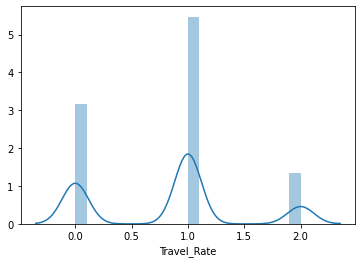

In [8]:
sns.distplot(df['Travel_Rate'])

In [11]:
y = df['Attrition_rate']
data = df.drop('Attrition_rate',axis=1)

In [12]:
data.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7
0,EID_23371,0,4,0,1,2,2,4,33,1,1,2,4,23371,1.8688,4,5,3
1,EID_18000,1,3,1,3,3,0,4,36,0,3,2,3,18000,-0.4537,3,5,3
2,EID_3891,0,3,0,0,8,2,3,51,0,2,2,4,3891,-0.4537,3,8,3
3,EID_17492,0,3,1,2,1,1,3,56,1,3,2,3,17492,-0.4537,3,7,3
4,EID_22534,0,1,0,3,3,2,4,62,1,3,3,1,22534,-0.4537,2,8,2


In [13]:
# Standardised Dataset
data.iloc[:,1:] = (data.iloc[:,1:]-data.iloc[:,1:].mean())/data.iloc[:,1:].std()

In [14]:
data.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7
0,EID_23371,-0.837500,0.762502,-0.740671,-1.006407,-0.872163,0.445880,1.420623,-0.892324,0.280996,-1.545044,-0.505523,1.077778,1.378503,1.907330,1.241667,-1.804822,-0.277742
1,EID_18000,1.193859,-0.176375,1.349933,0.692170,-0.574366,-1.341214,1.420623,-0.701986,-1.261726,0.173581,-0.505523,-0.117855,0.631953,-0.445921,0.176642,-1.804822,-0.277742
2,EID_3891,-0.837500,-0.176375,-0.740671,-1.855696,0.914620,0.445880,0.550600,0.249706,-1.261726,-0.685731,-0.505523,1.077778,-1.329149,-0.445921,0.176642,0.771917,-0.277742
3,EID_17492,-0.837500,-0.176375,1.349933,-0.157118,-1.169960,-0.447667,0.550600,0.566936,0.280996,0.173581,-0.505523,-0.117855,0.561343,-0.445921,0.176642,-0.086996,-0.277742
4,EID_22534,-0.837500,-2.054128,-0.740671,0.692170,-0.574366,0.445880,1.420623,0.947613,0.280996,0.173581,0.865520,-2.509121,1.262163,-0.445921,-0.888383,0.771917,-1.358450


In [17]:
train_x, test_x , train_y, test_y = train_test_split(data,y,test_size= 0.20, random_state=70)

In [93]:
 from sklearn.linear_model import LinearRegression

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(train_x.iloc[:,1:],train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
feature_importance = lr.coef_

In [103]:
features = list(train_x.iloc[:,1:].columns)

In [107]:
list_of_feature_importance = list(zip(features,feature_importance))

In [108]:
list_of_feature_importance

[('Gender', 0.006223644143506533),
 ('Education_Level', -0.002289899975052043),
 ('Relationship_Status', 0.002761902917921254),
 ('Hometown', 0.0013279248797581798),
 ('Unit', 0.0043477139304834095),
 ('Decision_skill_possess', 0.0026514126835053796),
 ('Time_since_promotion', 0.0006937338424191018),
 ('growth_rate', 0.0031132080632951024),
 ('Travel_Rate', -0.0011361160211952235),
 ('Post_Level', 0.0019243137748487479),
 ('Compensation_and_Benefits', -0.004605291323799252),
 ('VAR1', -0.001568007731530486),
 ('VAR2', 0.0004480370558720679),
 ('VAR3', 7.34534139653474e-05),
 ('VAR5', -0.004166978886114061),
 ('VAR6', 7.500309387856944e-05),
 ('VAR7', -0.003946780028215391)]

In [110]:
feature_importance_df = pd.DataFrame(list_of_feature_importance,columns=['Feature','Score'])
feature_importance_df

,Feature,Score
0,Gender,0.006224
1,Education_Level,-0.002290
2,Relationship_Status,0.002762
3,Hometown,0.001328
4,Unit,0.004348
5,Decision_skill_possess,0.002651
6,Time_since_promotion,0.000694
7,growth_rate,0.003113
8,Travel_Rate,-0.001136
9,Post_Level,0.001924


In [121]:
feature_importance_df.sort_values(by=['Score'],axis=0,ascending=False,inplace=True)

In [122]:
feature_importance_df

,Feature,Score
0,Gender,0.006224
4,Unit,0.004348
7,growth_rate,0.003113
2,Relationship_Status,0.002762
5,Decision_skill_possess,0.002651
9,Post_Level,0.001924
3,Hometown,0.001328
6,Time_since_promotion,0.000694
12,VAR2,0.000448
15,VAR6,0.000075


In [168]:
feature_list = list(feature_importance_df['Feature'].values)
feature_list = feature_list[0:11]
feature_list

['Gender',
 'Unit',
 'growth_rate',
 'Relationship_Status',
 'Decision_skill_possess',
 'Post_Level',
 'Hometown',
 'Time_since_promotion',
 'VAR2',
 'VAR6',
 'VAR3']

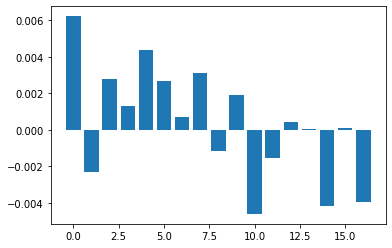

In [169]:
# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

In [170]:
# Fitting Once again on Linear Regression Model with 8 important features 

In [171]:
lr1 = LinearRegression()

In [172]:
lr1.fit(train_x.loc[:,feature_list],train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
pred = lr1.predict(test_x.loc[:,feature_list])

In [178]:
from sklearn.metrics import mean_squared_error

import numpy as np

In [175]:
pred = np.round(pred,4)

In [176]:
score = 100 *max(0,1-np.sqrt(mean_squared_error(test_y,pred)))
score

80.50969276061267

In [177]:
pred[:5]

array([0.1957, 0.1975, 0.1764, 0.181 , 0.177 ])

In [153]:
test= pd.read_csv('Dataset/cleaned_test_file.csv')

In [154]:
# Standardise test dataset
test.iloc[:,1:]= (test.iloc[:,1:]-test.iloc[:,1:].mean())/test.iloc[:,1:].std()

In [155]:
test_pred = lr1.predict(test.loc[:,feature_list])

In [156]:
test_pred = np.round(test_pred,4)

In [157]:
new_df = pd.DataFrame()

In [158]:
new_df['Employee_ID']= test['Employee_ID']
new_df['Attrition_rate'] = test_pred

In [159]:
new_df.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.1944
1,EID_9658,0.1995
2,EID_22203,0.1976
3,EID_7652,0.1893
4,EID_6516,0.1865


In [160]:
new_df.to_csv('Submission_file2.csv',index=False)